In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree

%matplotlib inline

In [2]:
def import_data(data):
    df = pd.read_csv(data)
    return df

In [3]:
data_1= import_data('dataset_1.csv')
data_2 = import_data('dataset_2.csv')
data_3 = import_data('dataset_3.csv')

In [4]:
data_3.activity.value_counts()

Watch_TV    61312
Read         8608
Cook         2764
Phone        1846
Eat           496
Name: activity, dtype: int64

In [5]:
data = data_1.append(data_2 , ignore_index=True)

In [6]:
data = data.append(data_3,ignore_index=True)

In [7]:
data.activity.value_counts()

Watch_TV    137216
Read         21967
Cook          9897
Phone         5814
Eat           4082
Name: activity, dtype: int64

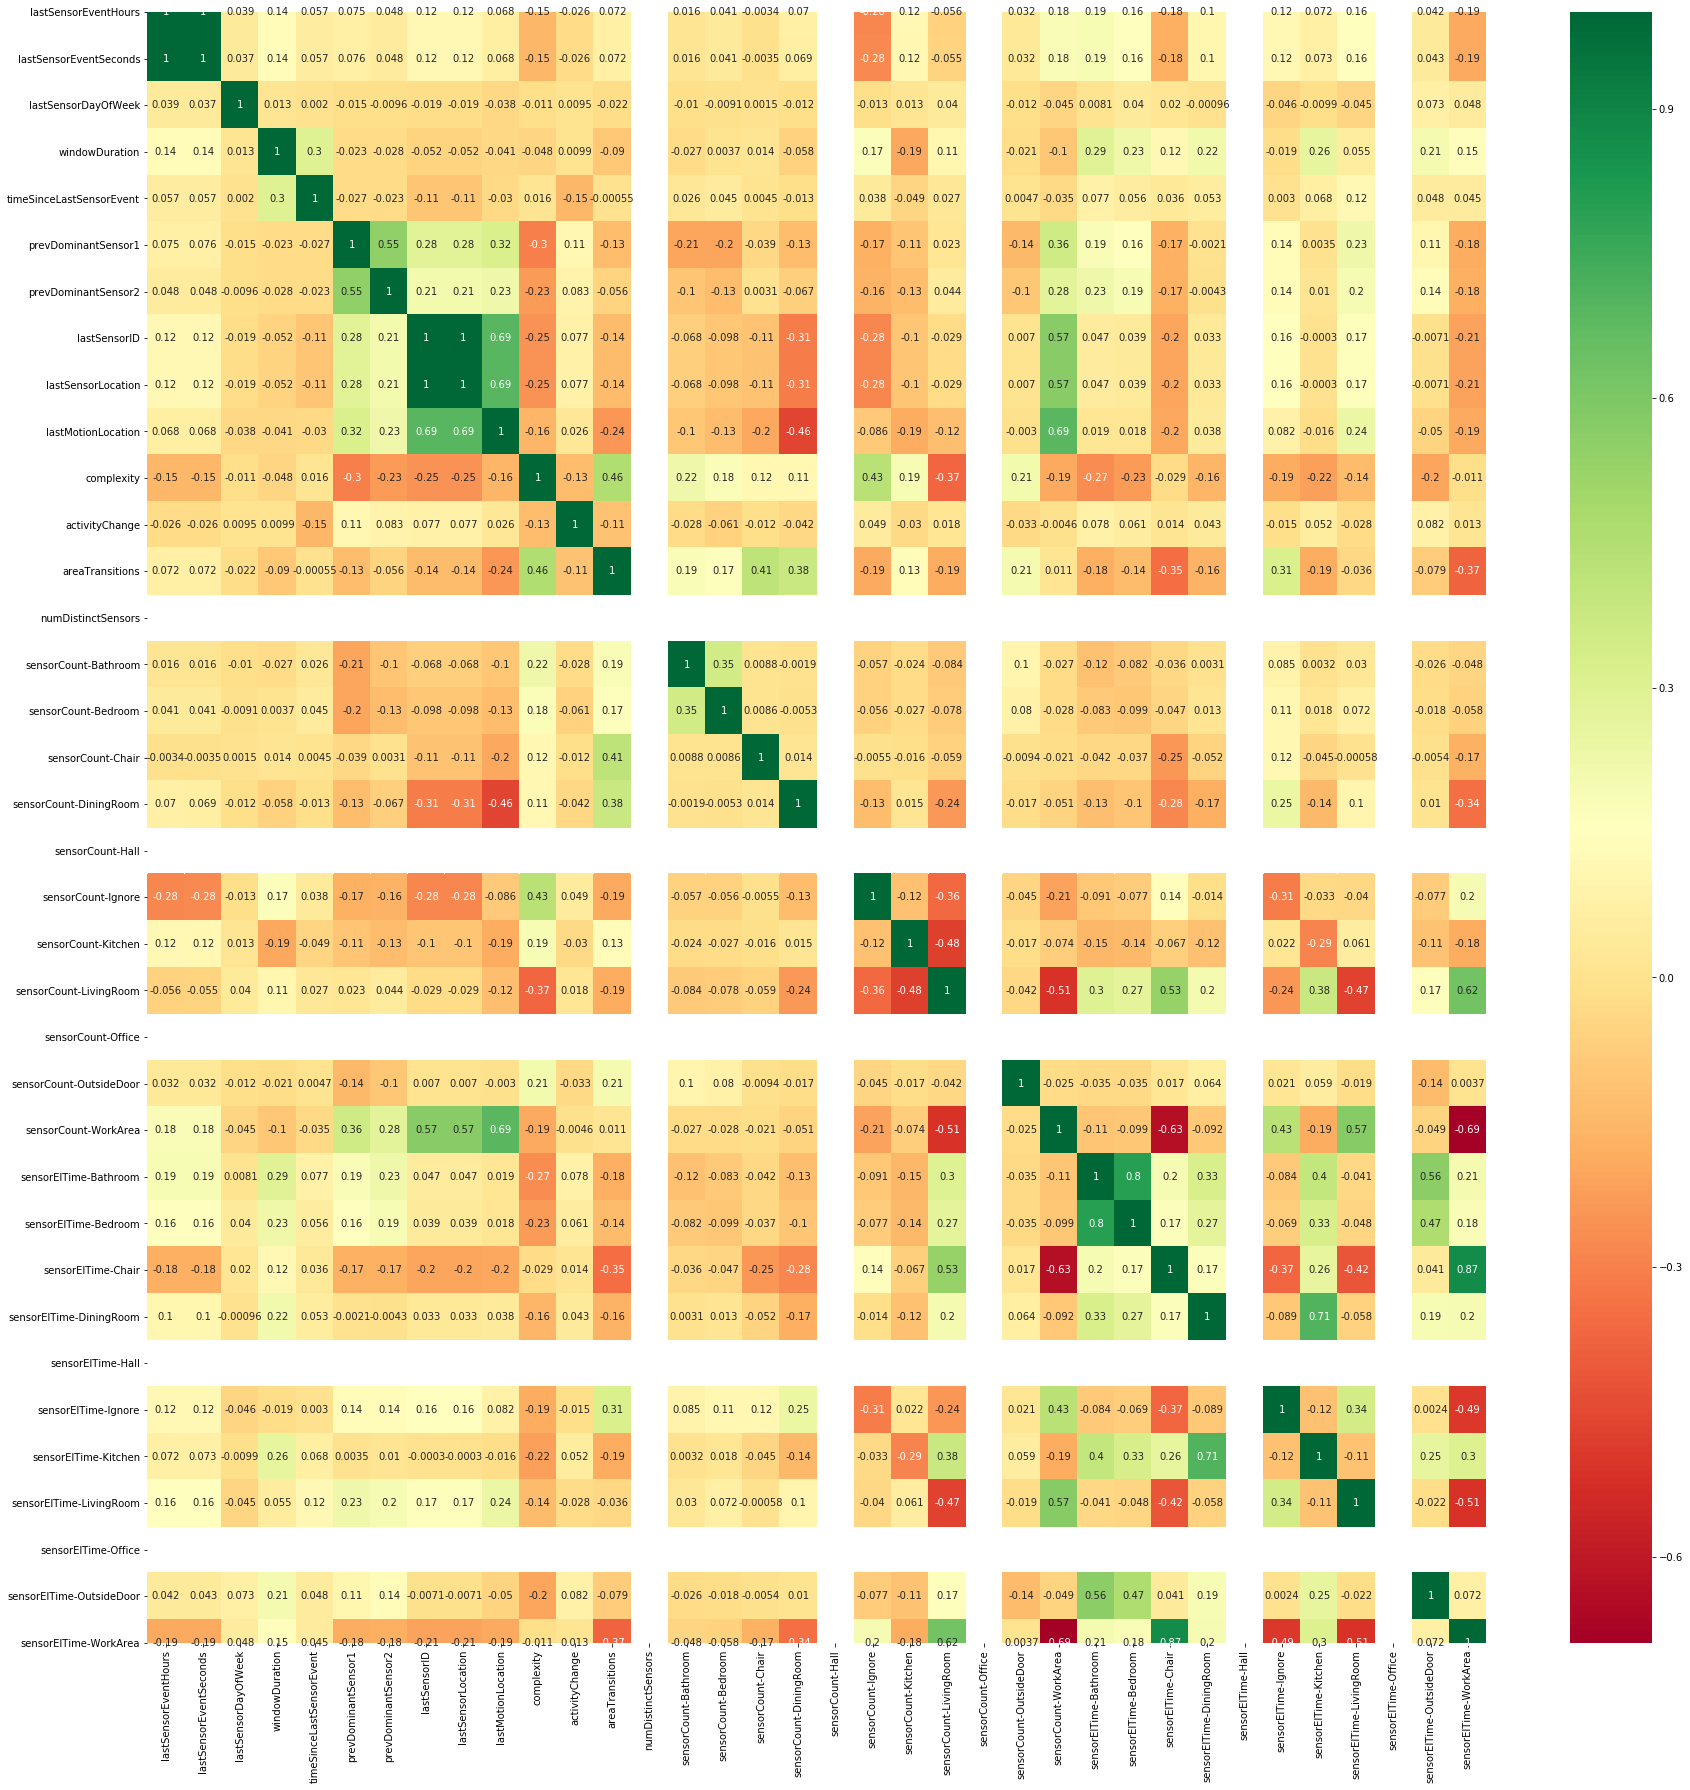

In [8]:
corrmat = data.corr() # Find Corr
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
data_value = data.drop('activity',axis=1).values
activity = data.activity.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_value, activity, test_size=0.20, random_state=142)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
def Model(X,y,algorithm,test):
    clf = algorithm.fit(X,y)
    pred = clf.predict(test)
    
    return clf, pred

In [14]:
# For model evolution
def model_evalution(y_test, y_pred):
    print("------------------- Model evaluation ----------------\n\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
    print("\nAccuracy Score : ",accuracy_score(y_test,y_pred),'\n')
    print("Classification Report : \n",classification_report(y_test, y_pred))
   

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf_tree,pred_tree =Model(X= X_train,y=y_train,algorithm=DecisionTreeClassifier(),test=X_test)

In [17]:
model_evalution(y_test,pred_tree)

------------------- Model evaluation ----------------


Confusion Matrix : 
 [[ 1949     0     0     2     1]
 [    2   803     7     1     2]
 [    0     1  1114     2     9]
 [    0     1     1  4390     7]
 [    2     8    10     2 27482]]

Accuracy Score :  0.9983797072298581 

Classification Report : 
               precision    recall  f1-score   support

        Cook       1.00      1.00      1.00      1952
         Eat       0.99      0.99      0.99       815
       Phone       0.98      0.99      0.99      1126
        Read       1.00      1.00      1.00      4399
    Watch_TV       1.00      1.00      1.00     27504

    accuracy                           1.00     35796
   macro avg       0.99      0.99      0.99     35796
weighted avg       1.00      1.00      1.00     35796



In [18]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_tree,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.9976881928679291


In [19]:
data_4 = import_data('dataset_4.csv')

In [20]:
data_4_values = sc.transform(data_4.drop('activity',axis=1).values)
data_4_activity = data_4.activity.values

In [21]:
pred_val_4 = clf_tree.predict(data_4_values)

In [22]:
model_evalution(data_4_activity,pred_val_4)

------------------- Model evaluation ----------------


Confusion Matrix : 
 [[ 2764     0     0     0     0]
 [    0   495     0     0     1]
 [    0     0  1842     0     4]
 [    0     0     0  8606     2]
 [    1     1     5     1 61304]]

Accuracy Score :  0.9998000693093061 

Classification Report : 
               precision    recall  f1-score   support

        Cook       1.00      1.00      1.00      2764
         Eat       1.00      1.00      1.00       496
       Phone       1.00      1.00      1.00      1846
        Read       1.00      1.00      1.00      8608
    Watch_TV       1.00      1.00      1.00     61312

    accuracy                           1.00     75026
   macro avg       1.00      1.00      1.00     75026
weighted avg       1.00      1.00      1.00     75026



In [23]:
data_5 = import_data('dataset_5.csv')
data_5_values = sc.transform(data_5.drop('activity',axis=1).values)
data_5_activity = data_5.activity.values

In [24]:
pred_val_5 = clf_tree.predict(data_5_values)

In [25]:
model_evalution(data_5_activity,pred_val_5)

------------------- Model evaluation ----------------


Confusion Matrix : 
 [[ 2764     0     0     0     0]
 [    0   495     0     0     1]
 [    0     0  1842     0     4]
 [    0     0     0  8606     2]
 [    1     1     5     1 61304]]

Accuracy Score :  0.9998000693093061 

Classification Report : 
               precision    recall  f1-score   support

        Cook       1.00      1.00      1.00      2764
         Eat       1.00      1.00      1.00       496
       Phone       1.00      1.00      1.00      1846
        Read       1.00      1.00      1.00      8608
    Watch_TV       1.00      1.00      1.00     61312

    accuracy                           1.00     75026
   macro avg       1.00      1.00      1.00     75026
weighted avg       1.00      1.00      1.00     75026

